## Import Dependency

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Load Dataset

In [9]:
file =  '../Dataset/student_depression_dataset.csv'

In [11]:
df = pd.read_csv(file)

In [13]:
# Sample Data
print(df.head())

# Rows and Columns Count
print ("Rows and Column")
print(df.shape)

# Get basic statistics for numerical columns
print(df.describe())

# Check column data types
print(df.dtypes)

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

## Data Pre Processing

## Encoding Categorical Data

In [11]:
# Encode Categorical data to numeric

# Perform One-Hot Encoding for 'sex', 'smoker', and 'region'
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

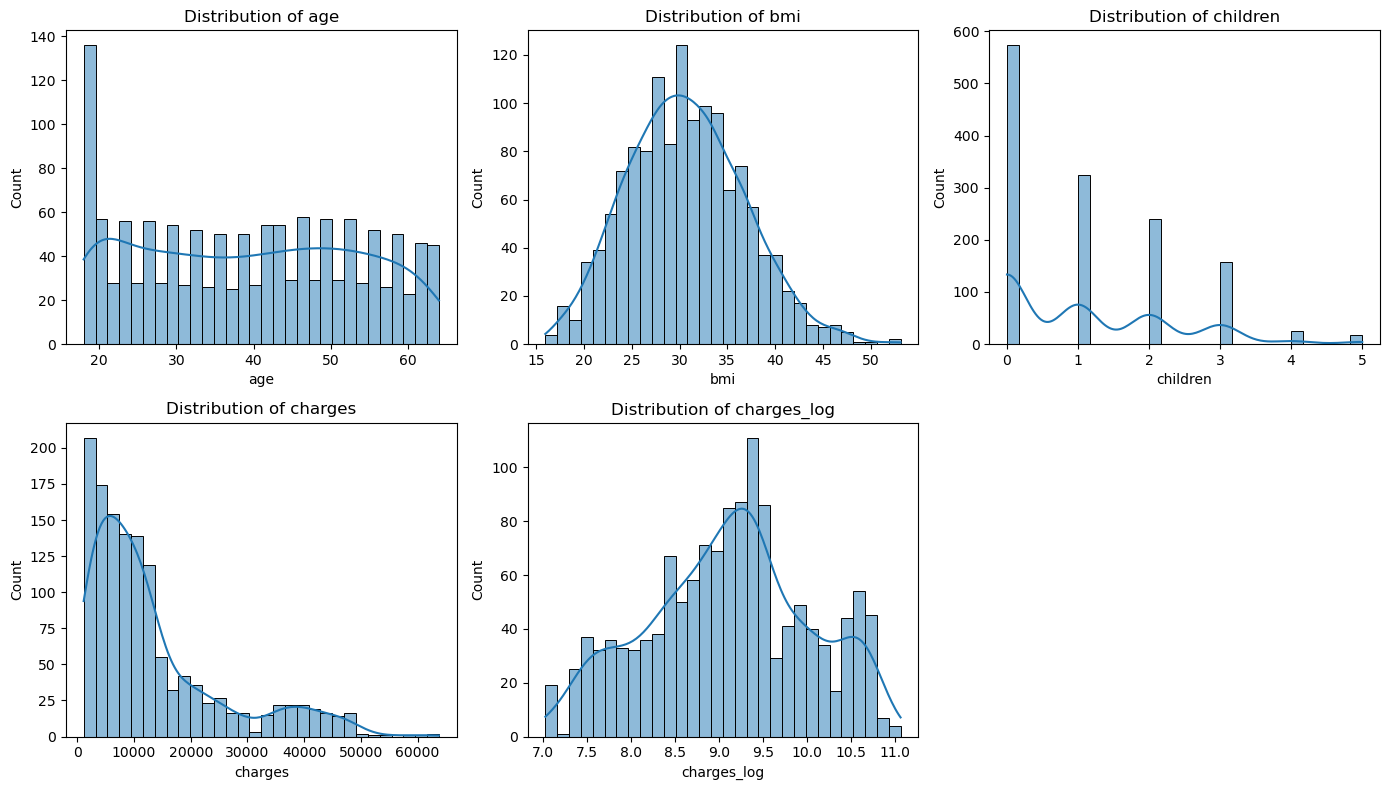

In [13]:
# Apply log transformation to 'charges' to handle the positive skew
df['charges_log'] = np.log1p(df['charges'])  # log1p is log(x + 1)

# Update numerical columns to include 'charges_log'
numerical_cols = ['age', 'bmi', 'children', 'charges', 'charges_log']

# Create a figure and axes for subplots
plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns (for 5 variables)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Handling Imbalanced data

In [15]:
# Split the dataset into training and testing sets
X = df.drop('smoker_yes', axis=1)
y = df['smoker_yes']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into one DataFrame
df = pd.concat([X_resampled, y_resampled.rename('smoker_yes')], axis=1)

# Check the new class balance
print("Resampled dataset created successfully!")
print(df['smoker_yes'].value_counts())
print("\nUpdated DataFrame shape:", df.shape)
df.head()

Resampled dataset created successfully!
smoker_yes
True     1063
False    1063
Name: count, dtype: int64

Updated DataFrame shape: (2126, 10)


,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,charges_log,smoker_yes
0,19,27.900,0,16884.92400,False,False,False,True,9.734236,True
1,18,33.770,1,1725.55230,True,False,True,False,7.453882,False
2,28,33.000,3,4449.46200,True,False,True,False,8.400763,False
3,33,22.705,0,21984.47061,True,True,False,False,9.998137,False
4,32,28.880,0,3866.85520,True,True,False,False,8.260455,False


## Feature Selection

Feature Importances

            Feature  Importance
7        smoker_yes    0.621925
1               bmi    0.275749
0               age    0.081517
2          children    0.008890
4  region_northwest    0.003350
5  region_southeast    0.003298
3          sex_male    0.002830
6  region_southwest    0.002440


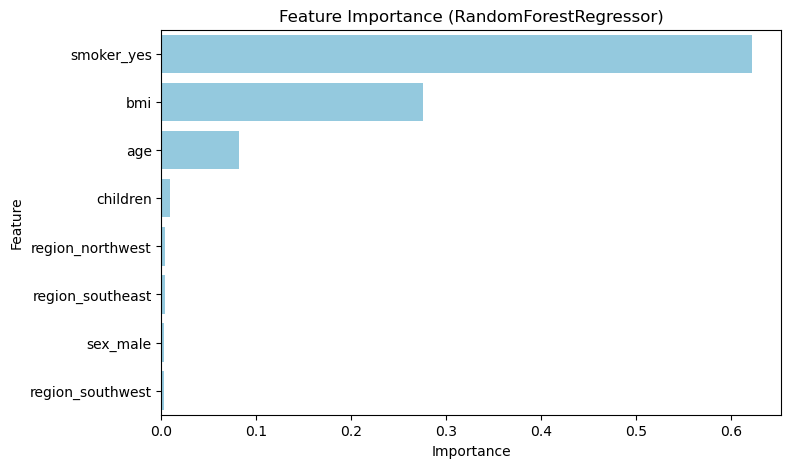

In [17]:

# Define features (X) and target (y) from the current df
X = df.drop(['charges', 'charges_log'], axis=1, errors='ignore')
y = df['charges']

# Train the RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display results
print("Feature Importances\n")
print(importances)

# Visualize feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importances, color='skyblue')
plt.title("Feature Importance (RandomForestRegressor)")
plt.show()

In [18]:
# Selected features
selected_features = ['age', 'bmi', 'smoker_yes']

# Create new DataFrame with features + target
df_processed = df[selected_features + ['charges', 'charges_log']]

# Check
print(df_processed.head())
print("Shape:", df_processed.shape)


   age     bmi  smoker_yes      charges  charges_log
0   19  27.900        True  16884.92400     9.734236
1   18  33.770       False   1725.55230     7.453882
2   28  33.000       False   4449.46200     8.400763
3   33  22.705       False  21984.47061     9.998137
4   32  28.880       False   3866.85520     8.260455
Shape: (2126, 5)


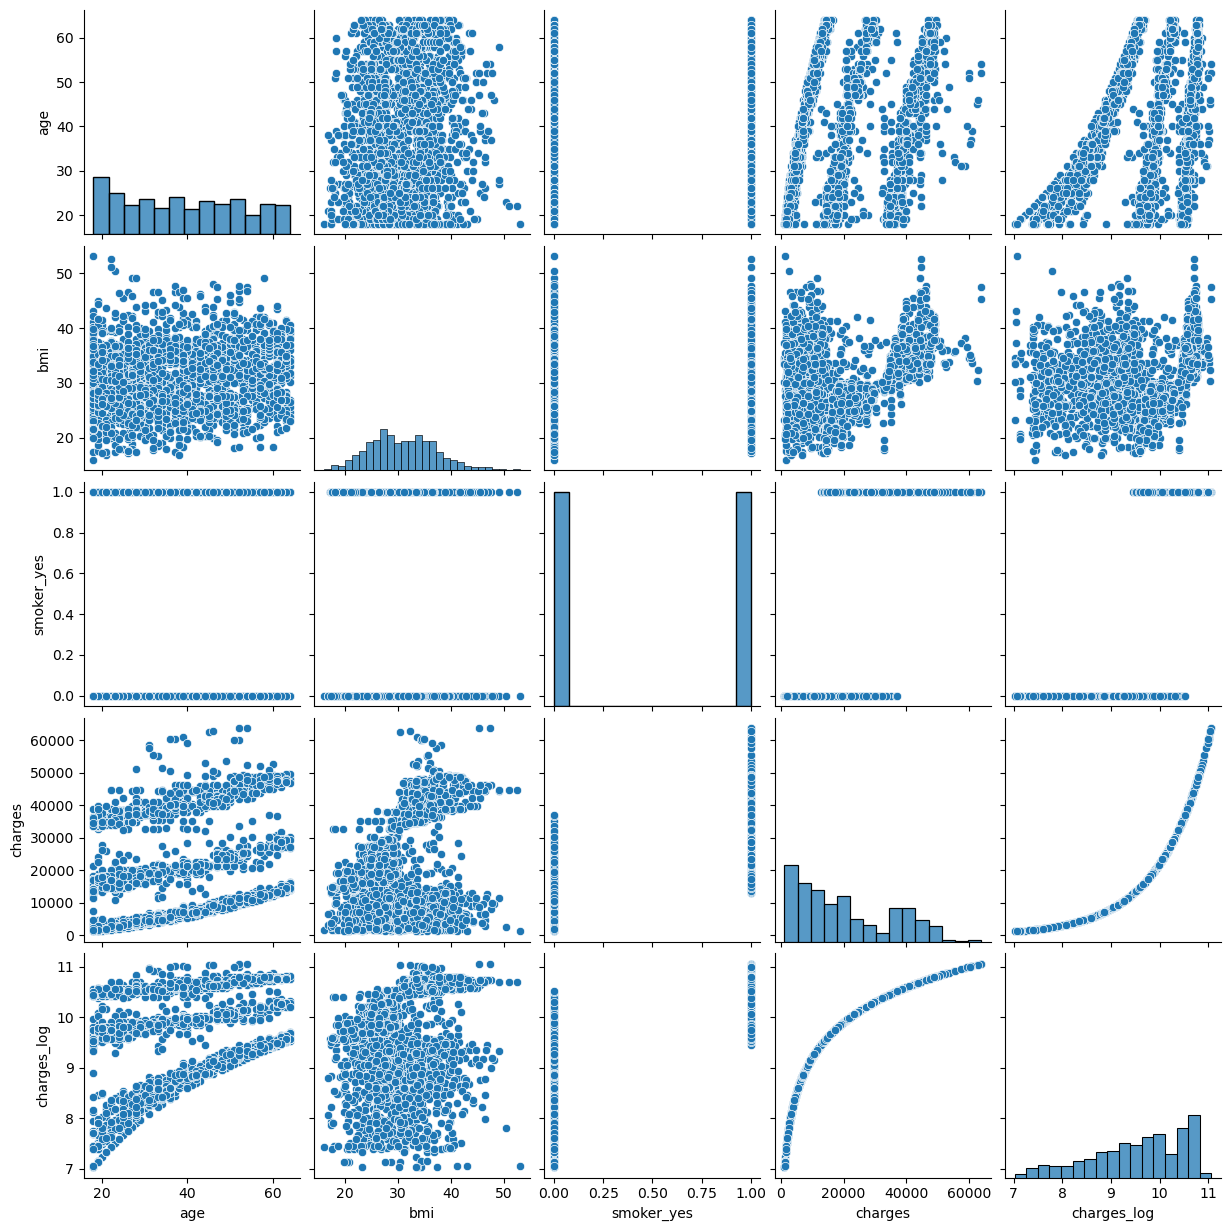

In [19]:
sns.pairplot(df_processed)
plt.show()

## Export Processed Dataset

In [21]:
# Export processed DataFrame to CSV
df_processed.to_csv('../Dataset/processed_insurance.csv', index=False)

print("Data exported successfully!")

Data exported successfully!
